In [3]:
import nltk
import pandas as pd
from nltk.corpus import gutenberg
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to C:\Users\Md Rana
[nltk_data]     Mahmud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


In [95]:
extra_abbreviations = ['i','dr', 'vs', 'mr', 'mrs','miss', 'prof', 'inc', 'i.e']

1.Choose a corpus of interest.

In [96]:
emma = gutenberg.words('austen-emma.txt')

2.How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).

In [97]:
# clean the text

In [98]:
# Remove puncatuation 
words = [word for word in emma if word.isalpha()]
# Remove stepwords
words = [w.lower() for w in words if w not in stopwords]
words = [w.lower() for w in words if w not in extra_abbreviations]
words[1:10]

['jane',
 'austen',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich']

In [99]:
count_emma = set(words)
print(len(count_emma))

7040


There are 7040 unique words in the corpus.

3.Taking the most common words, how many unique words represent half of the total words in the corpus?Identify the 200 highest frequency words in this corpus.

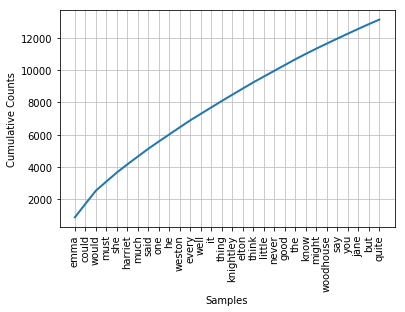

In [100]:
emma_freq_dist = nltk.FreqDist(words)
emma_freq_dist
%matplotlib inline
emma_freq_dist.plot(30,cumulative=True)

In [101]:
for key,value in emma_freq_dist.most_common(200):
    print(key,value)

emma 865
could 837
would 820
must 567
she 562
harriet 506
much 486
said 484
one 452
he 441
weston 440
every 435
well 401
it 400
thing 398
knightley 389
elton 385
think 383
little 359
never 358
good 358
the 357
know 337
might 326
woodhouse 313
say 310
you 303
jane 301
but 293
quite 282
time 279
great 264
nothing 256
dear 241
fairfax 241
always 238
man 235
thought 226
soon 224
and 224
churchill 224
see 222
may 221
shall 217
without 214
first 209
frank 208
father 207
sure 204
indeed 202
like 200
made 199
body 193
ever 193
oh 193
day 192
young 192
two 178
friend 177
though 177
better 173
come 172
hartfield 160
give 159
upon 159
way 155
really 153
make 152
they 148
bates 148
long 146
rather 146
us 145
hope 143
done 142
cannot 142
seemed 141
away 138
many 138
poor 136
wish 135
even 132
go 132
woman 131
however 131
home 130
there 129
enough 129
mind 128
no 126
happy 125
a 125
highbury 125
yes 125
look 121
going 120
heard 120
moment 120
came 119
last 119
take 119
half 118
love 117
room 117
ple

5 common word represents 50% of the total words in the corpus

# Most common 200 words

In [103]:
for key,value in emma_freq_dist.most_common(200):
    print(key)

emma
could
would
must
she
harriet
much
said
one
he
weston
every
well
it
thing
knightley
elton
think
little
never
good
the
know
might
woodhouse
say
you
jane
but
quite
time
great
nothing
dear
fairfax
always
man
thought
soon
and
churchill
see
may
shall
without
first
frank
father
sure
indeed
like
made
body
ever
oh
day
young
two
friend
though
better
come
hartfield
give
upon
way
really
make
they
bates
long
rather
us
hope
done
cannot
seemed
away
many
poor
wish
even
go
woman
however
home
there
enough
mind
no
happy
a
highbury
yes
look
going
heard
moment
came
last
take
half
love
room
pleasure
still
another
felt
something
sort
morning
if
yet
my
letter
how
this
saw
till
what
believe
feelings
certainly
idea
hear
speak
perhaps
doubt
subject
evening
party
house
people
feel
ought
word
place
deal
right
found
looked
often
want
randalls
let
john
present
coming
we
smith
her
almost
knew
visit
best
old
martin
least
possible
hour
kind
friends
world
together
suppose
cried
gone
life
else
perry
replied
told
fam

4.Create a graph that shows the relative frequency of these 200 words.

In [73]:
df = pd.DataFrame(emma_freq_dist.most_common(200))

In [104]:
df.head()

,index,0,1,freq
0,0,i,3178,0.080684
1,1,mr,1153,0.029273
2,2,emma,865,0.021961
3,3,could,837,0.021250
4,4,would,820,0.020819


In [105]:
# Calcualte relative frequency
df['freq'] = df[1]/df[1].sum()

In [106]:
df.reset_index(inplace=True)

In [107]:
df.head()

,level_0,index,0,1,freq
0,0,0,i,3178,0.080684
1,1,1,mr,1153,0.029273
2,2,2,emma,865,0.021961
3,3,3,could,837,0.021250
4,4,4,would,820,0.020819


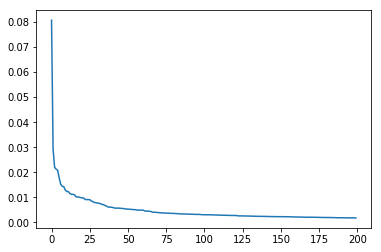

In [108]:
df['freq'].plot()

5.Does the observed relative frequency of these words follow Zipf’s law? Explain.

The pbserved relative frequency follow Zip's law.The frequency of the most common words type is inversely
proportional to its rank. For example, the 50th
most common word type occurs three times as frequently as the 150th most
common word type.

6.In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency of the corpus differes from the frequency in allwords in all corpora because this corpus frequency distribution is different from other corpuses.